/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteración: 1
Tamaño del conjunto de entrenamiento: 2576
Tamaño del conjunto para la predicción: 515
Fechas de inicio y fin del conjunto de entrenamiento: 1997-05-16 00:00:00 - 2007-08-20 00:00:00
Fechas de inicio y fin del conjunto para la predicción: 2007-08-21 00:00:00 - 2009-09-03 00:00:00
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


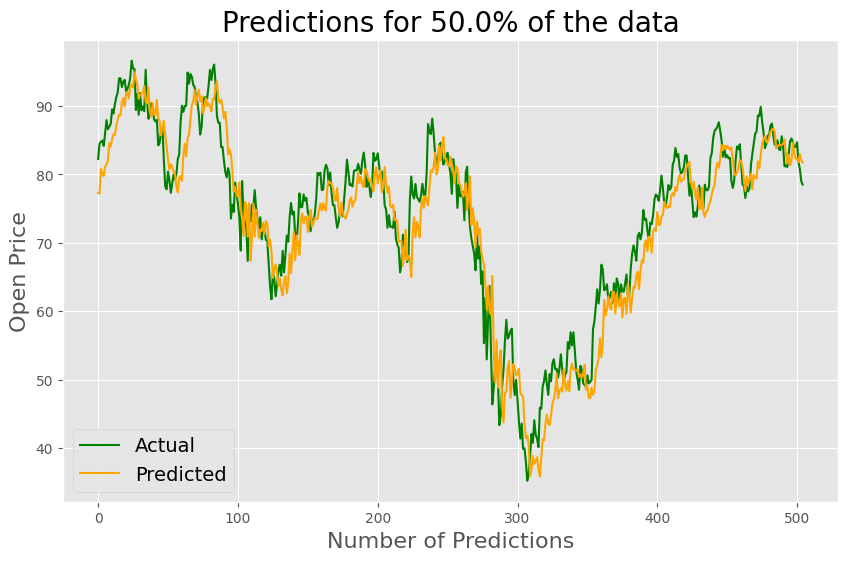

Iteración: 2
Tamaño del conjunto de entrenamiento: 3091
Tamaño del conjunto para la predicción: 516
Fechas de inicio y fin del conjunto de entrenamiento: 1997-05-16 00:00:00 - 2009-09-03 00:00:00
Fechas de inicio y fin del conjunto para la predicción: 2009-09-04 00:00:00 - 2011-09-21 00:00:00
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


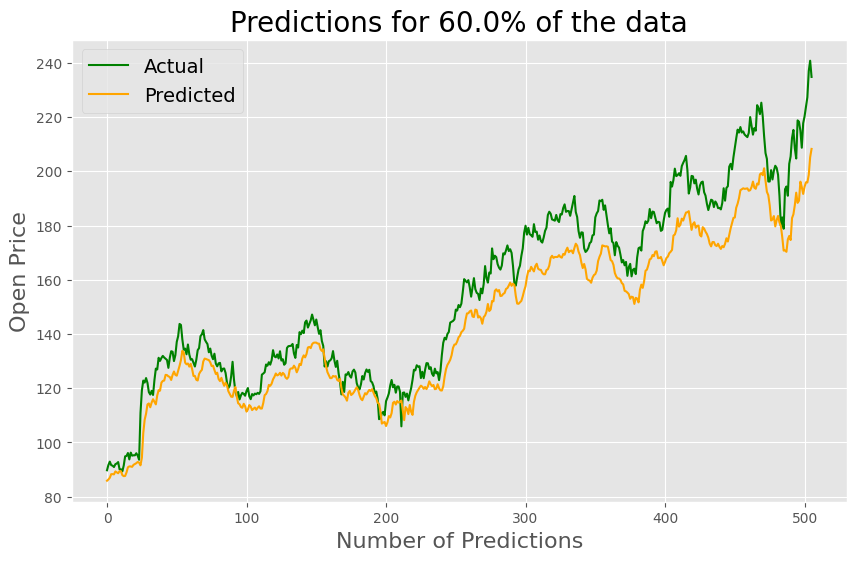

Iteración: 3
Tamaño del conjunto de entrenamiento: 3607
Tamaño del conjunto para la predicción: 515
Fechas de inicio y fin del conjunto de entrenamiento: 1997-05-16 00:00:00 - 2011-09-21 00:00:00
Fechas de inicio y fin del conjunto para la predicción: 2011-09-22 00:00:00 - 2013-10-09 00:00:00
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


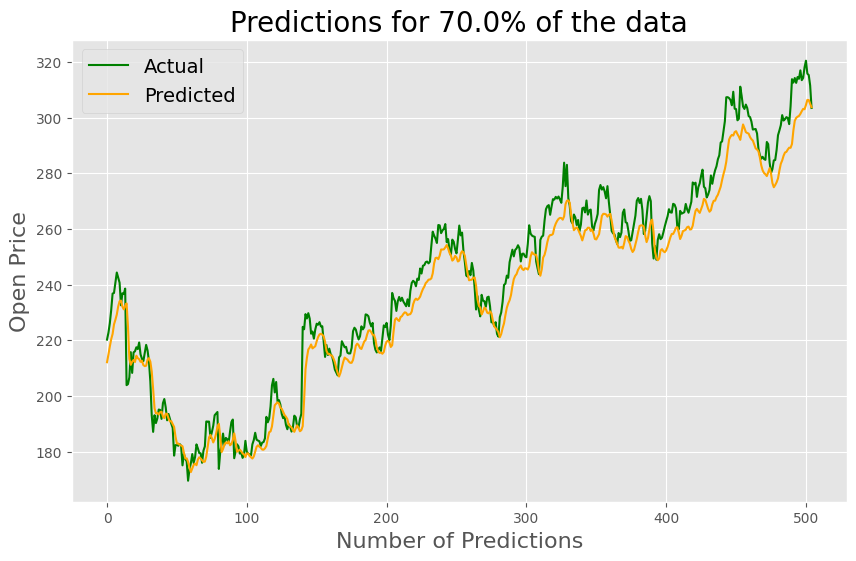

Iteración: 4
Tamaño del conjunto de entrenamiento: 4122
Tamaño del conjunto para la predicción: 515
Fechas de inicio y fin del conjunto de entrenamiento: 1997-05-16 00:00:00 - 2013-10-09 00:00:00
Fechas de inicio y fin del conjunto para la predicción: 2013-10-10 00:00:00 - 2015-10-26 00:00:00
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


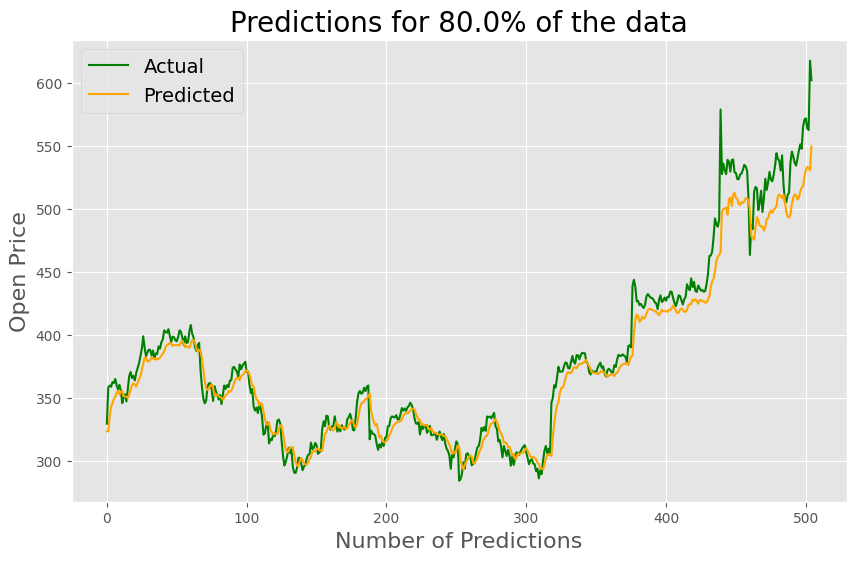

Iteración: 5
Tamaño del conjunto de entrenamiento: 4637
Tamaño del conjunto para la predicción: 516
Fechas de inicio y fin del conjunto de entrenamiento: 1997-05-16 00:00:00 - 2015-10-26 00:00:00
Fechas de inicio y fin del conjunto para la predicción: 2015-10-27 00:00:00 - 2017-11-10 00:00:00
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


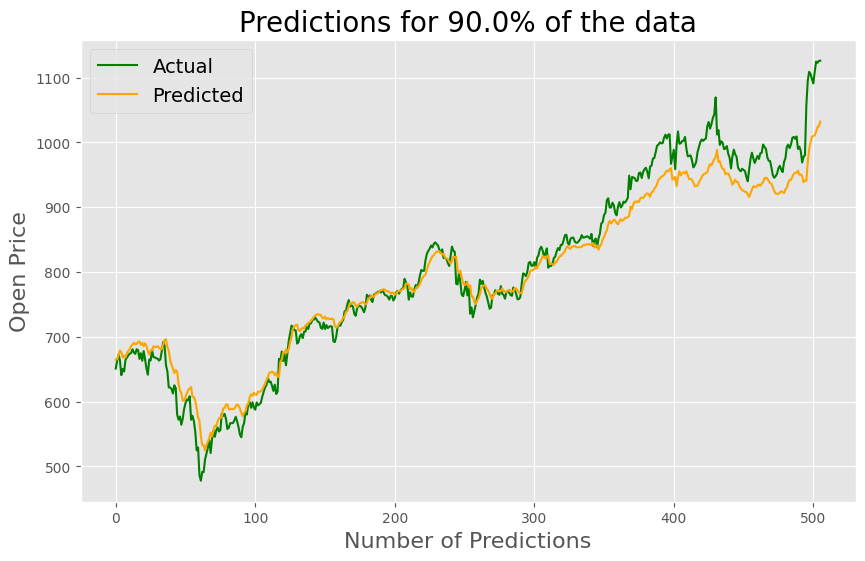

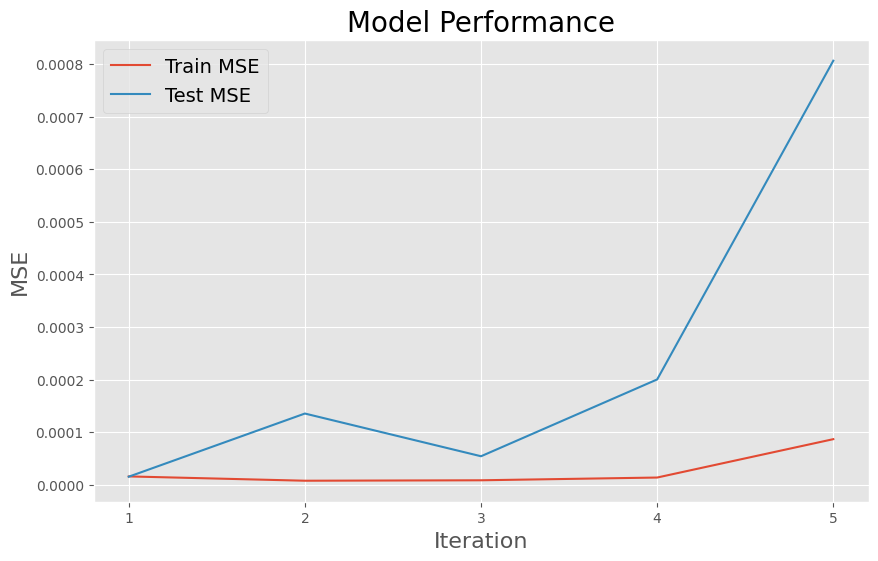

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

# Descargar los datos
df = pd.read_csv('amzn.us.txt')
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
df['Open'] = scaler.fit_transform(df[['Open']])

# Función para dividir los datos de entrenamiento y testeo
def train_test_split(data, train_size):
    train_index = int(len(data) * train_size)
    train_data, test_data = data[:train_index], data[train_index:]
    return train_data, test_data

# Función para crear secuencias de datos para el modelo RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parámetros
seq_length = 10  # longitud de la secuencia de entrada
train_size_initial = 0.5  # tamaño inicial del conjunto de entrenamiento
train_size_increment = 0.1  # incremento en el tamaño del conjunto de entrenamiento


model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,return_sequences = True))
model.add(SimpleRNN(units = 50,return_sequences = True))
model.add(SimpleRNN(units = 50))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Listas para almacenar las métricas de rendimiento
mse_train = []
mse_test = []

# El bucle debe ir de 0 a 5 para incluir el 50%, 60%, ..., 100% de los datos
for i in range(5):
    train_size = train_size_initial + i * train_size_increment
    
    if train_size > 1.0:
        break

    print("Iteración:", i+1)
    
    # Tamaño del conjunto de entrenamiento y conjunto para la predicción
    train_index_end = int(train_size * len(df))
    if train_index_end > len(df):
        train_index_end = len(df)

    test_index_start = train_index_end
    test_index_end = int((train_size + train_size_increment) * len(df))
    if test_index_end > len(df):
        test_index_end = len(df)

    train_start_date = df.index[0]
    train_end_date = df.index[train_index_end - 1]
    test_start_date = df.index[test_index_start] if test_index_start < len(df) else df.index[-1]
    test_end_date = df.index[test_index_end - 1] if test_index_end <= len(df) else df.index[-1]

    print("Tamaño del conjunto de entrenamiento:", train_index_end)
    print("Tamaño del conjunto para la predicción:", test_index_end - test_index_start)
    print("Fechas de inicio y fin del conjunto de entrenamiento:", train_start_date, "-", train_end_date)
    print("Fechas de inicio y fin del conjunto para la predicción:", test_start_date, "-", test_end_date)
    
    # Entrenar el modelo
    train_data, _ = train_test_split(df['Open'].values, train_size)
    X_train, y_train = create_sequences(train_data, seq_length)
    if len(X_train) == 0:  # Evitar el entrenamiento si no hay suficientes datos
        print("No hay suficientes datos para entrenar en esta iteración.")
        continue
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Calcular el error cuadrático medio en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    
    # Realizar la predicción en el siguiente conjunto de prueba
    test_data = df['Open'].values[test_index_start:test_index_end]
    X_test, y_test = create_sequences(test_data, seq_length)
    if len(X_test) == 0:  # Evitar la predicción si no hay suficientes datos
        print("No hay suficientes datos para predecir en esta iteración.")
        continue
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    y_pred = model.predict(X_test)
    mse_test.append(mean_squared_error(y_test, y_pred))
    
    # Plotear resultados para la predicción actual
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual', color = "green")
    plt.plot(range(len(y_pred)), scaler.inverse_transform(y_pred), label='Predicted', color = "orange")
    plt.title(f'Predictions for {(train_size + train_size_increment - 0.1):.1%} of the data', fontsize=20)
    plt.xlabel('Number of Predictions', fontsize=16)
    plt.ylabel('Open Price', fontsize=16)
    plt.legend(fontsize=14)
    plt.savefig(f'RNN_plot_{i}.png') 
    plt.show()

# Graficar las métricas de rendimiento
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_train) + 1), mse_train, label='Train MSE')
plt.plot(range(1, len(mse_test) + 1), mse_test, label='Test MSE')
plt.title('Model Performance', fontsize=20)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.xticks(range(1, len(mse_train) + 1))
plt.legend(fontsize=14)
plt.savefig('RNN.png')
plt.show()


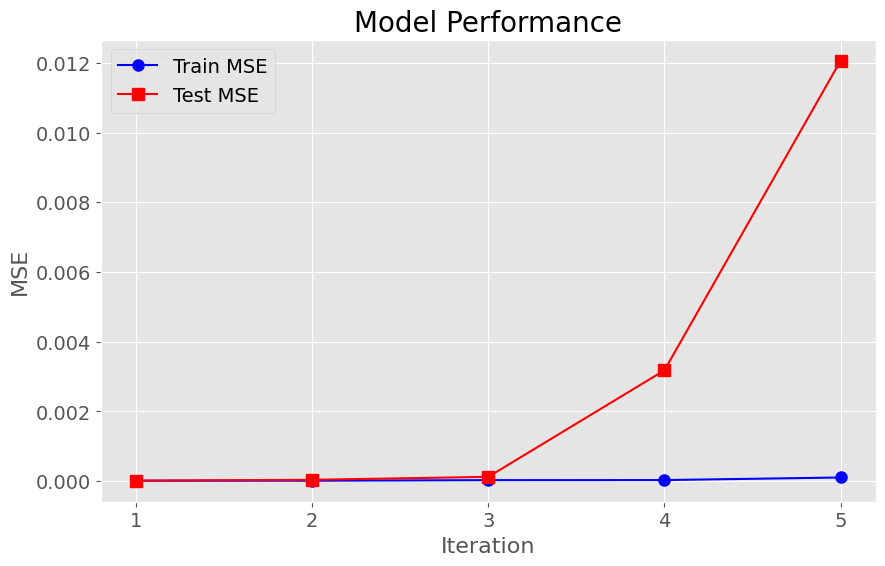

In [2]:
import matplotlib.pyplot as plt

# Establecer estilo de gráfico y ajustar algunas configuraciones
plt.style.use('ggplot')

# Graficar las métricas de rendimiento
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_train) + 1), mse_train, marker='o', label='Train MSE', markersize=8, color='blue')
plt.plot(range(1, len(mse_test) + 1), mse_test, marker='s', label='Test MSE', markersize=8, color='red')

plt.title('Model Performance', fontsize=20)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.xticks(range(1, len(mse_train) + 1), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Guardar el gráfico
plt.savefig('RNN.png', bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Establecer estilo de gráfico y ajustar algunas configuraciones
plt.style.use('ggplot')

# Suavizar los datos con interpolación spline
x_new = np.linspace(1, len(mse_train), 300)  # Crear una nueva serie de puntos más densos
spl_train = make_interp_spline(range(1, len(mse_train) + 1), mse_train)
spl_test = make_interp_spline(range(1, len(mse_test) + 1), mse_test)
mse_train_smooth = spl_train(x_new)
mse_test_smooth = spl_test(x_new)

# Graficar las métricas de rendimiento con líneas suavizadas y puntos
plt.figure(figsize=(10, 6))
plt.plot(x_new, mse_train_smooth, label='Train MSE', color='blue', linestyle='-')
plt.scatter(range(1, len(mse_train) + 1), mse_train, color='blue', marker='o')
plt.plot(x_new, mse_test_smooth, label='Test MSE', color='red', linestyle='-')
plt.scatter(range(1, len(mse_test) + 1), mse_test, color='red', marker='o')

plt.title('Model Performance', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Guardar el gráfico
plt.savefig('RNN.png', bbox_inches='tight')
plt.show()